<a href="https://colab.research.google.com/github/YujiaLIAO-1/housing/blob/main/assignment03_task1_starter(second_try).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# read the titanic csv file into a data frame
import pandas as pd
df = pd.read_csv("train.csv")

In [61]:
# check missing values ratio for all columns
df.isnull().sum()/len(df)

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [62]:
# delete the column with more than 70% missing values
df.drop('Cabin',axis=1, inplace=True)

In [63]:
# impute the remaining missing value using mean for numerical columns and most frequent value for categorical values
#以平均值填补空值
df.Age.fillna(df.Age.mean(), inplace=True)

#以出现频率最大的值填补（常针对文字）
most_frequent=df.Embarked.value_counts().idxmax()
df.Embarked.fillna(most_frequent, inplace=True)

<ipython-input-63-8c604d0f46dd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace=True)
<ipython-input-63-8c604d0f46dd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [64]:
# check missing values again to make sure there are no missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


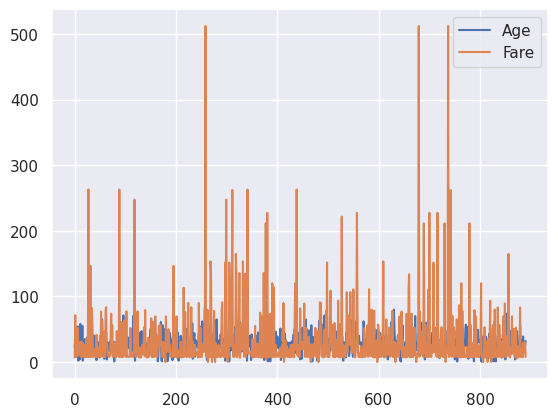

In [65]:
# use seaborn style and pandas plotting to show a line plot for Age and Fare
# 1. there might be some outliers 2. the scales of Age and Fare are apparently different
# a sample diagram is shown below
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

fig, ax=plt.subplots()
df[['Age','Fare']].plot(ax=ax)

plt.show()

![1](https://user-images.githubusercontent.com/595772/159173231-5556799d-4734-4b55-98c9-4a80b492809c.png)

In [66]:
# calculate the z scores for Age and Fare and store them in two new columns
from scipy import stats
df['Fare_scaled'] = stats.zscore(df.Fare)
df['Age_scaled'] = stats.zscore(df.Age)


In [67]:
# remove the outliers in Age and Fare with z score > 3 or < -3
df=df[(df['Fare_scaled']>-3)&(df['Fare_scaled']<3)]
df=df[(df['Age_scaled']>-3)&(df['Age_scaled']<3)]

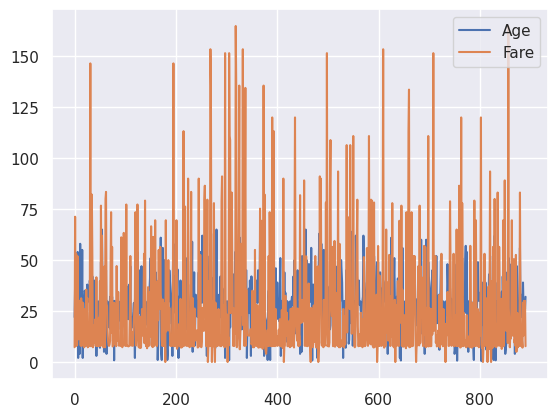

In [76]:
# plot the same line plot again to see that the outliers are removed
sns.set(style="darkgrid")

fig, ax=plt.subplots()
df[['Age','Fare']].plot(ax=ax)

plt.show()

![2](https://user-images.githubusercontent.com/595772/159173320-8058c97c-9058-45f6-8d8a-c3a75541b23d.png)

In [69]:
# update the zscore (recalculate again given that some outliers may have been removed)
df['Fare_scaled'] = stats.zscore(df.Fare)
df['Age_scaled'] = stats.zscore(df.Age)

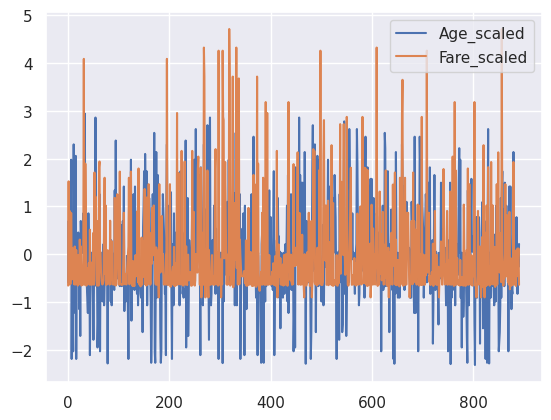

In [70]:
# plot the zscores for Age and Fare to see the results of standardization
sns.set(style="darkgrid")

fig, ax=plt.subplots()
df[['Age_scaled','Fare_scaled']].plot(ax=ax)

plt.show()

![3](https://user-images.githubusercontent.com/595772/159173335-83f68e63-b887-4c81-94e8-7ae0469854c0.png)

In [77]:
# use ordinal encoding to encode Sex into a new column
# you cannot hard code the ordinal mapper
ordinal_mapper = {'male': 0, 'female': 1}
df['Sex_encoded'] = df.Sex.replace(ordinal_mapper)


<ipython-input-77-c1fb35c3ec8a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex_encoded'] = df.Sex.replace(ordinal_mapper)


In [79]:
# show the first 10 lines of Sex and encoded Sex columns
df[['Sex', 'Sex_encoded']].head(10)

,Sex,Sex_encoded
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1



<img width="212" src="https://user-images.githubusercontent.com/595772/159177589-d6b1ba99-37a1-4372-a34b-3832fd6b5d05.png">

In [88]:
# use one-hot encoding to encode Embarked column
df_dummy = pd.get_dummies(df.Embarked).astype(int)

In [89]:
# concatenate the new dummy variable columns with existing data frame
df_combined = pd.concat([df, df_dummy], axis=1)
df_combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_scaled,Age_scaled,Sex_encoded,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,-0.655160,-0.586622,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1.524090,0.695098,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,-0.632188,-0.266192,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0.905257,0.454776,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,-0.627934,0.454776,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,-0.459470,-0.186085,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0.119092,-0.826945,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,-0.103824,0.030135,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0.119092,-0.266192,0,1,0,0


In [90]:
# random choose 10 rows to show Embarked column and the new dummy variable columns
# you need df.sample() for this question: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
# a sample output is shown next - note your result may vary given the random sampling
random_sample = df_combined[['Embarked','C','Q','S']].sample(n=10, random_state=1)
random_sample

,Embarked,C,Q,S
614,S,0,0,1
57,C,1,0,0
497,S,0,0,1
85,S,0,0,1
609,S,0,0,1
370,C,1,0,0
35,S,0,0,1
830,C,1,0,0
3,S,0,0,1
707,S,0,0,1


<img width="224" src="https://user-images.githubusercontent.com/595772/159177615-d4c84e8a-9bf6-4a8f-8a48-96f87b6e55b4.png">